## 1. Importing necessary Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

## 2.Data Preprocessing

In [16]:
data= pd.read_csv('train.csv')
data.shape

(42000, 785)

In [17]:
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X= data.iloc[:, 1:].values
X.shape

(42000, 784)

In [19]:
y=data.iloc[:, 0].values
y.shape

(42000,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [21]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

##3. Model Training and Prediction

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()

In [23]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_test[100]

5

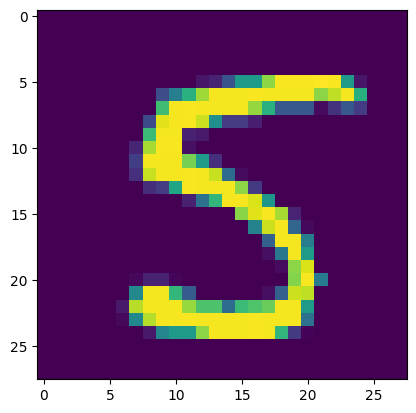

In [25]:
plt.imshow(X_test[100].reshape(28,28))

In [26]:
classifier.predict(X_test[100].reshape(1,784))

array([5])

##4. Performance Measures

In [30]:
predict= classifier.predict(X_test)
predict

array([8, 1, 6, ..., 1, 1, 9])

Now lets plot the confusion matrix

In [33]:
con_met= metrics.confusion_matrix(y_test, predict)
con_met

array([[743,   0,  10,  10,   4,  13,   9,   5,   5,   2],
       [  0, 898,  15,   9,   6,   8,   4,   9,  18,   1],
       [  8,  16, 669,  33,  13,   4,  13,  26,  34,  13],
       [ 10,   8,  24, 712,   9,  45,   6,  20,  32,  19],
       [  7,  10,  18,   6, 682,   6,  17,  10,  23,  29],
       [ 14,  12,   5,  35,  10, 611,  27,   6,  28,  19],
       [ 13,   2,  16,   5,  12,  29, 703,   4,  15,   4],
       [  1,   6,  20,   7,   9,   6,   0, 769,  13,  24],
       [ 20,  17,  30,  20,  22,  37,  14,  13, 643,  19],
       [  5,  10,   9,  24,  44,  25,   1,  31,  17, 683]])

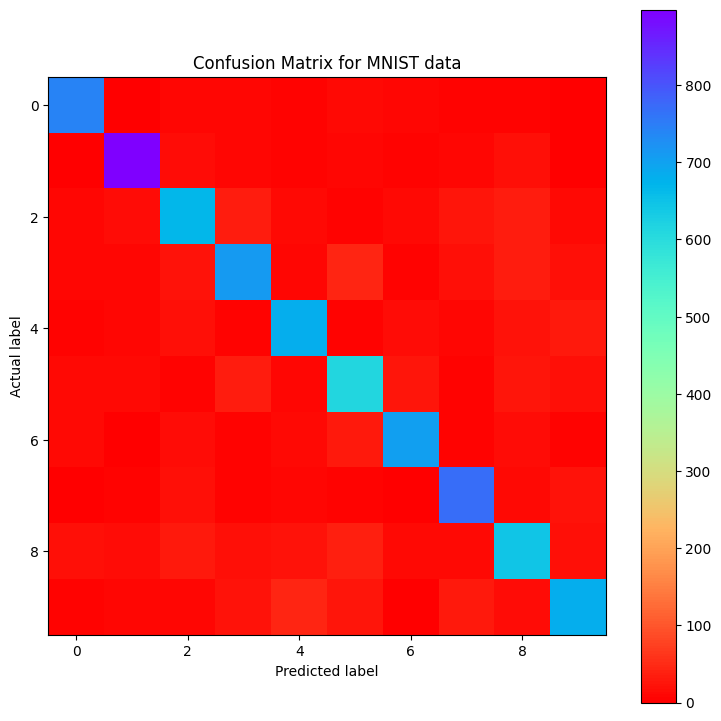

In [35]:
plt.figure(figsize=(9,9))
plt.imshow(con_met, cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST data")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.colorbar()

plt.show()

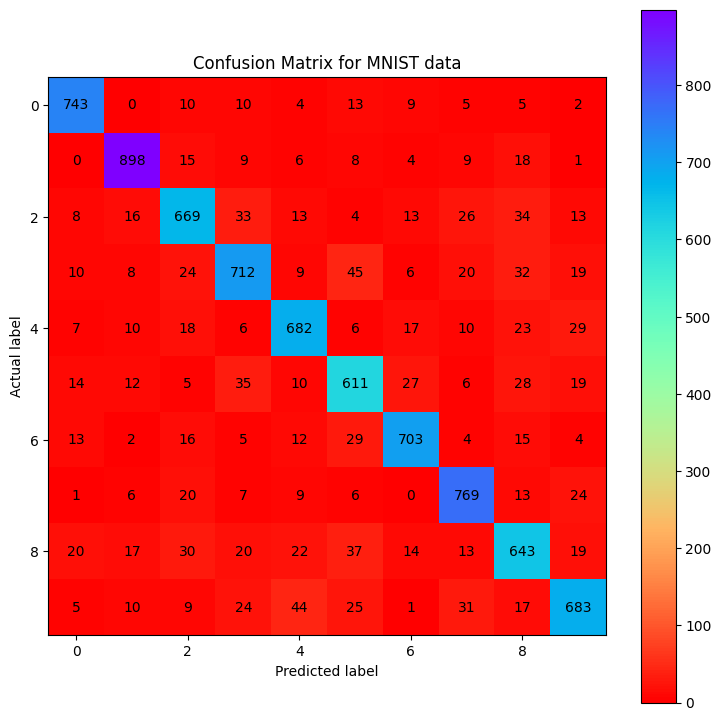

In [37]:
plt.figure(figsize=(9,9))
plt.imshow(con_met, cmap='rainbow_r')
plt.title("Confusion Matrix for MNIST data")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.colorbar()

#lets annotate the plot
width,height=con_met.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(con_met[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')
plt.show()